<a href="https://colab.research.google.com/github/MannJadhav/Aryan/blob/main/Fake%20%26%20Real%20News%20Detection%20using%20Bayes'%20Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake & Real News Detection

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Upload Kaggle json file

In [4]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"mannjadhav","key":"0d7ede5415cfead1c045082c468749aa"}'}

#  Set Up Kaggle API in Colab

In [6]:
import os

# Move kaggle.json to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set file permissions
!chmod 600 ~/.kaggle/kaggle.json


#  Download Dataset from Kaggle

In [7]:
# Download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# Unzip the dataset
!unzip fake-and-real-news-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
 49% 20.0M/41.0M [00:00<00:00, 203MB/s]
100% 41.0M/41.0M [00:00<00:00, 224MB/s]
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


#  Load and Preprocess Dataset

In [8]:
import pandas as pd

# Load fake and real news CSV files
df_fake = pd.read_csv("Fake.csv")
df_real = pd.read_csv("True.csv")

# Add labels (1 = Fake, 0 = Real)
df_fake["label"] = 1
df_real["label"] = 0

# Combine both datasets
df = pd.concat([df_fake, df_real])

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Show first few rows
df.head()


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",0


#  Train the Fake News Detector

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Select features and labels
X = df["text"]
y = df["label"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 93.54%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      4270
           1       0.93      0.94      0.94      4710

    accuracy                           0.94      8980
   macro avg       0.94      0.93      0.94      8980
weighted avg       0.94      0.94      0.94      8980



# Data Visualizing

<ipython-input-12-a16d24047420>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="coolwarm")


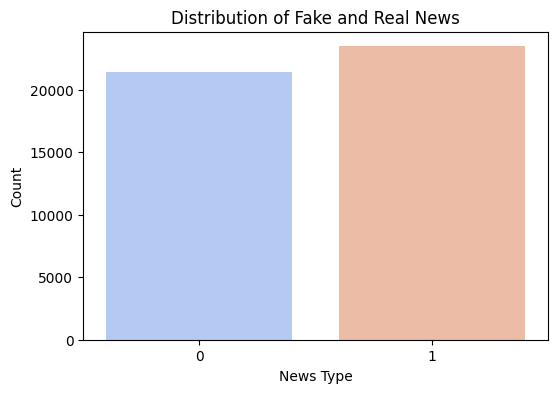

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="label", palette="coolwarm")
plt.title("Distribution of Fake and Real News")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()


Generate a Word Cloud for Fake and Real News

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


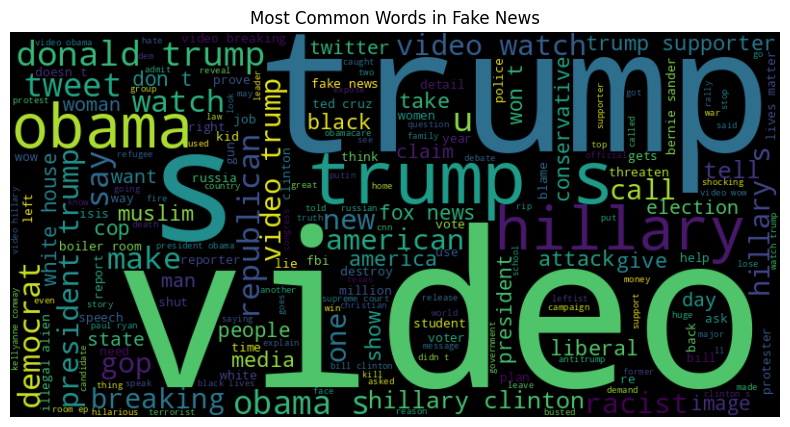

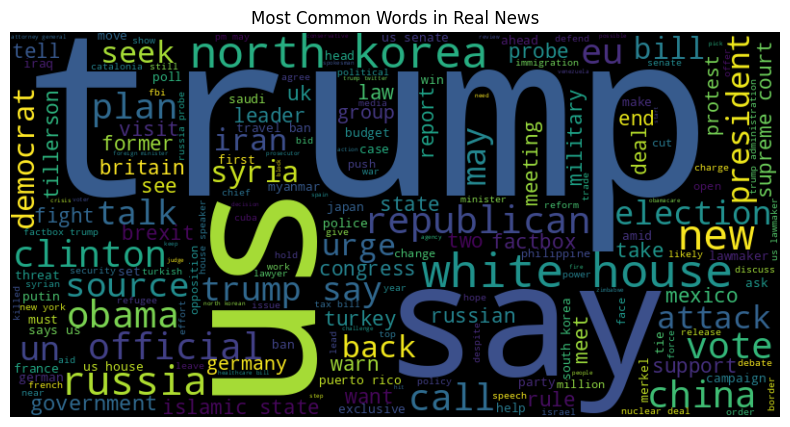

In [15]:
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud


nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def clean_text(text):
    """Remove punctuation, convert to lowercase, and remove stopwords"""
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Generate WordCloud for Fake News
fake_text = " ".join(df_fake["title"].dropna().apply(clean_text))
wordcloud_fake = WordCloud(width=800, height=400, background_color="black").generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Fake News")
plt.show()

# Generate WordCloud for Real News
real_text = " ".join(df_real["title"].dropna().apply(clean_text))
wordcloud_real = WordCloud(width=800, height=400, background_color="black").generate(real_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Real News")
plt.show()

Article Length Distribution

<ipython-input-17-f234e9479ecd>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


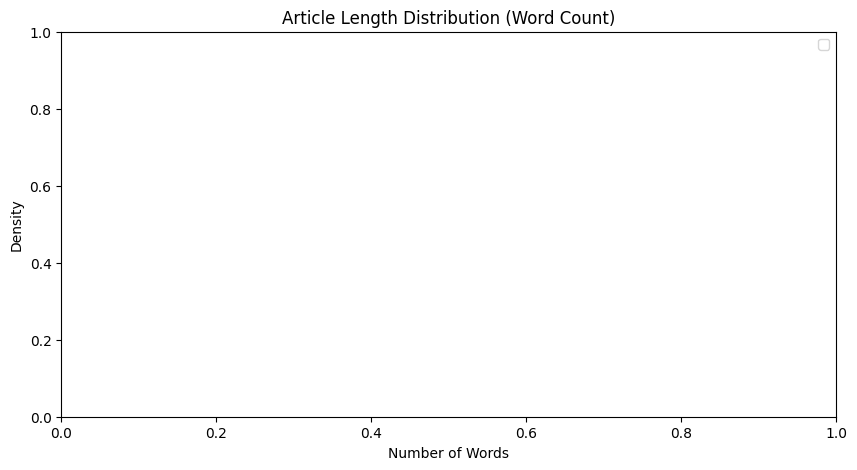

In [17]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
sns.histplot(df[df["label"] == "Fake"]["text_length"], bins=50, kde=True, color="red", label="Fake News")
sns.histplot(df[df["label"] == "Real"]["text_length"], bins=50, kde=True, color="blue", label="Real News")
plt.title("Article Length Distribution (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.legend()
plt.show()


Most Common Words in Fake vs. Real News

<ipython-input-18-1cd14a858c8f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=df_fake_words, palette="Reds_r")


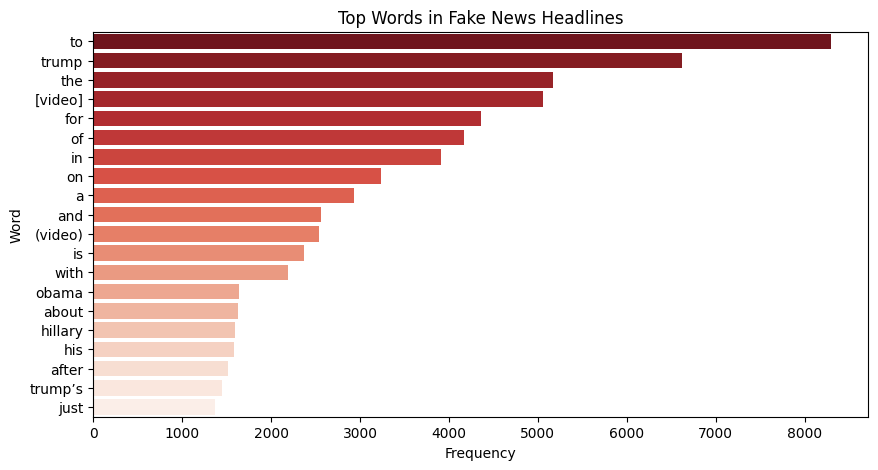

<ipython-input-18-1cd14a858c8f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=df_real_words, palette="Blues_r")


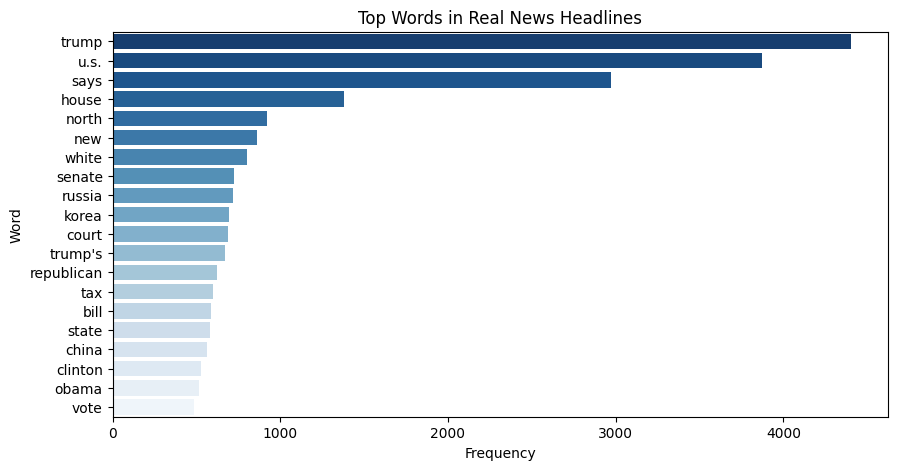

In [18]:
from collections import Counter

# Function to get most common words
def get_most_common_words(text_series, num_words=20):
    words = " ".join(text_series.dropna()).split()
    words = [word.lower() for word in words if word not in stop_words]
    return dict(Counter(words).most_common(num_words))

# Get most common words in Fake and Real news
fake_words = get_most_common_words(df_fake["title"])
real_words = get_most_common_words(df_real["title"])

# Convert to DataFrame for visualization
df_fake_words = pd.DataFrame(fake_words.items(), columns=["Word", "Frequency"])
df_real_words = pd.DataFrame(real_words.items(), columns=["Word", "Frequency"])

# Plot Fake News Words
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=df_fake_words, palette="Reds_r")
plt.title("Top Words in Fake News Headlines")
plt.show()

# Plot Real News Words
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=df_real_words, palette="Blues_r")
plt.title("Top Words in Real News Headlines")
plt.show()


#  Test with Custom News

In [19]:
def predict_news(news_text):
    pred = model.predict([news_text])[0]
    return "Fake News" if pred == 1 else "Real News"

print("\nEnter a news article to test:")
sample_news = input()
print("\nPrediction:", predict_news(sample_news))



Enter a news article to test:
South Mumbai gets on the Metro map this March

Prediction: Real News


# Mount Google Drive

In [20]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


# Save the Model in Drive

In [21]:
import joblib

# Define path in Google Drive
model_path = "/content/drive/My Drive/fake_news_detector.pkl"

# Save model
joblib.dump(model, model_path)

print(f"Model saved successfully at: {model_path}")


Model saved successfully at: /content/drive/My Drive/fake_news_detector.pkl
